In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("C:/Users/acer/Downloads/tmdb_5000_movies.csv/tmdb_5000_movies.csv")

In [3]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [4]:
#Handle missing or null values in the dataset
df['runtime']=df['runtime'].fillna(df['runtime'].mean())

In [7]:
df['runtime'].value_counts()

90.0     163
100.0    149
98.0     140
97.0     133
95.0     123
        ... 
338.0      1
216.0      1
166.0      1
194.0      1
60.0       1
Name: runtime, Length: 157, dtype: int64

In [10]:
df['revenue']=df['revenue'].dropna()
df['budget']=df['budget'].dropna()

In [11]:
#Convert release_date to datetime format.
df['release_date']=pd.to_datetime(df['release_date'])

In [36]:
#Find the top 10 highest-grossing movies.
df[['title','revenue']].sort_values(by='revenue',ascending=False).head(10)

,title,revenue
0,Avatar,2787965087
25,Titanic,1845034188
16,The Avengers,1519557910
28,Jurassic World,1513528810
44,Furious 7,1506249360
7,Avengers: Age of Ultron,1405403694
124,Frozen,1274219009
31,Iron Man 3,1215439994
546,Minions,1156730962
26,Captain America: Civil War,1153304495


In [60]:
#List the most popular genres and their average ratings.
df.groupby(['genres'])['vote_average'].mean()


genres
[]                                                                                                                                                                2.335714
[{"id": 10402, "name": "Music"}, {"id": 10749, "name": "Romance"}]                                                                                                6.566667
[{"id": 10402, "name": "Music"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}]    6.600000
[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 80, "name": "Crime"}]                                      6.700000
[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                   6.350000
                                                                                                                                          

In [62]:
#Calculate the average runtime of movies for each genre.
df_genres = df.assign(genres=df['genres'].str.split('|')).explode('genres')
df_genres.groupby(['genres'])['runtime'].mean()


genres
[]                                                                                                                                                                 50.392857
[{"id": 10402, "name": "Music"}, {"id": 10749, "name": "Romance"}]                                                                                                101.666667
[{"id": 10402, "name": "Music"}, {"id": 12, "name": "Adventure"}, {"id": 16, "name": "Animation"}, {"id": 28, "name": "Action"}, {"id": 35, "name": "Comedy"}]     98.000000
[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}, {"id": 80, "name": "Crime"}]                                      104.000000
[{"id": 10402, "name": "Music"}, {"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                   108.000000
                                                                                                                                

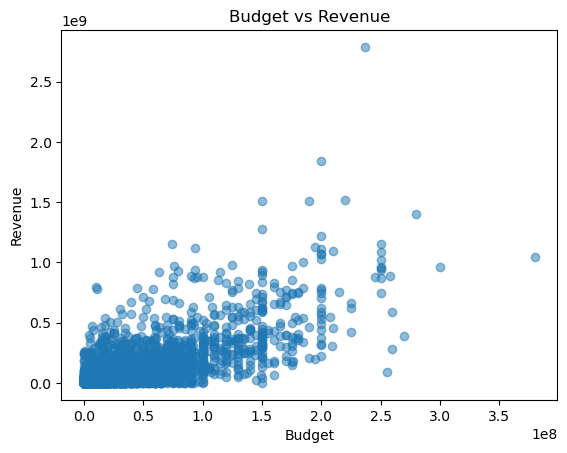

In [49]:
#Analyze the relationship between budget and revenue using scatter plots
import matplotlib.pyplot as plt

plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


In [50]:
df['year']=df['release_date'].dt.year

In [75]:
#Find the year with the highest average revenue.
df.groupby(['year','revenue']).mean().idxmax().max()

C:\Users\acer\AppData\Local\Temp\ipykernel_11804\2006404116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['year','revenue']).mean().idxmax().max()


(2017.0, 0)

In [67]:
#Determine the top 5 directors (if the dataset has a director column) based on average movie ratings
df.groupby(['production_companies','vote_average']).mean().sort_values(by='vote_average',ascending=False ).head(5)

C:\Users\acer\AppData\Local\Temp\ipykernel_11804\3509566828.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['production_companies','vote_average']).mean().sort_values(by='vote_average',ascending=False ).head(5)


,,budget,id,popularity,revenue,runtime,vote_count,year
production_companies,vote_average,,,,,,,
[],10.0,0.5,225683.0,0.225300,0.0,94.5,1.5,2006.5
"[{""name"": ""Fly High Films"", ""id"": 24248}]",10.0,0.0,40963.0,0.092100,0.0,0.0,1.0,2006.0
"[{""name"": ""HSX Films"", ""id"": 4714}, {""name"": ""Chase Productions"", ""id"": 16517}]",10.0,0.0,78373.0,0.376662,565592.0,97.0,1.0,1998.0
[],9.5,0.0,346081.0,0.296981,0.0,0.0,2.0,2015.0
"[{""name"": ""Filmax"", ""id"": 3631}, {""name"": ""Silver Lion Films"", ""id"": 11601}, {""name"": ""Televisa S.A. de C.V."", ""id"": 55465}, {""name"": ""Arco Films S.L"", ""id"": 55776}, {""name"": ""Hool/Macdonald Productions"", ""id"": 55777}, {""name"": ""Producciones San Patricia"", ""id"": 55778}]",9.3,0.0,69848.0,0.910529,0.0,121.0,2.0,1999.0


<BarContainer object of 4803 artists>

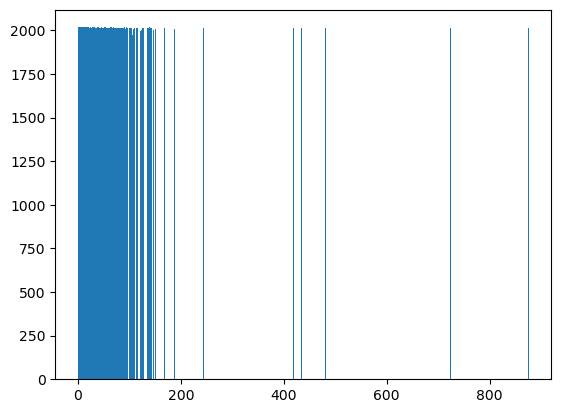

In [73]:
df.groupby(['year'])['popularity'].mean()
plt.bar(df['popularity'],df['year'])